# ПРОЕКТ E-COMMERCE

In [155]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

%matplotlib inline

In [156]:
# Выключение ворнингов
import warnings
warnings.filterwarnings('ignore')

## ПОДГОТОВКА ДАННЫХ

#### olist_customers_dataset.csv —  таблица с уникальными идентификаторами пользователей

-  customer_id                 —  позаказный идентификатор пользователя
-  customer_unique_id          —  уникальный идентификатор пользователя  (аналог номера паспорта)
-  customer_zip_code_prefix    —  почтовый индекс пользователя
-  customer_city               —  город доставки пользователя
-  customer_state              —  штат доставки пользователя

In [157]:
df_customers = pd.read_csv('olist_customers_dataset.csv')

In [158]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [159]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [160]:
df_customers.shape

(99441, 5)

In [161]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


<div class='alert alert-block alert-info'>
    Уникальных customer_unique_id = 96096, всего = 99441.
    Это значит, что какие-то customer_unique_id повторяются.<br>
    Уникальных customer_id = 99441, и всего тоже = 99441. 
    Ниже при анализе попробуем разобраться для чего это нужно.
</div>

#### olist_orders_dataset.csv      —  таблица заказов

-  order_id                      —  уникальный идентификатор заказа (номер чека)
-  customer_id                   —  позаказный идентификатор пользователя
-  order_status                  —  статус заказа
-  order_purchase_timestamp      —  время создания заказа
-  order_approved_at             —  время подтверждения оплаты заказа
-  order_delivered_carrier_date  —  время передачи заказа в логистическую службу
-  order_delivered_customer_date —  время доставки заказа
-  order_estimated_delivery_date —  обещанная дата доставки

#### Уникальные статусы заказов:

-  created     —  создан
-  approved    —  подтверждён
-  invoiced    —  выставлен счёт
-  processing  —  в процессе сборки заказа
-  shipped     —  отгружен со склада
-  delivered   —  доставлен пользователю
-  unavailable —  недоступен
-  canceled    —  отменён

In [162]:
df_orders = pd.read_csv('olist_orders_dataset.csv')

In [163]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [164]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [165]:
df_orders.shape

(99441, 8)

In [166]:
df_orders['order_purchase_timestamp']      = pd.to_datetime(df_orders.order_purchase_timestamp)
df_orders['order_approved_at']             = pd.to_datetime(df_orders.order_approved_at)
df_orders['order_delivered_carrier_date']  = pd.to_datetime(df_orders.order_delivered_carrier_date)
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders.order_delivered_customer_date)
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders.order_estimated_delivery_date)

In [167]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [168]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


#### olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
-  order_id                      —  уникальный идентификатор заказа (номер чека)
-  order_item_id                 —  идентификатор товара внутри одного заказа
-  product_id                    —  ид товара (аналог штрихкода)
-  seller_id                     —  ид производителя товара
-  shipping_limit_date           —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
-  price                         —  цена за единицу товара
-  freight_value                 —  вес товара

In [169]:
df_items = pd.read_csv('olist_order_items_dataset.csv')

In [170]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [171]:
df_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [172]:
df_items.shape

(112650, 7)

In [173]:
df_items['shipping_limit_date'] = pd.to_datetime(df_items.shipping_limit_date)

In [174]:
df_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [175]:
df_items.describe(include='all').round(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.00,112650,112650,112650,112650.00,112650.00
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.20,NaN,NaN,NaN,120.65,19.99
std,NaN,0.71,NaN,NaN,NaN,183.63,15.81
min,NaN,1.00,NaN,NaN,NaN,0.85,0.00
25%,NaN,1.00,NaN,NaN,NaN,39.90,13.08


## АНАЛИЗ

Посмотрим на уникальные идентификаторы пользователей. Проверим много ли пользователей с повторяющимися customer_unique_id

In [176]:
df_unique_id = df_customers.groupby('customer_unique_id', as_index=False)\
                .agg({'customer_id':'count'})\
                .sort_values('customer_id', ascending=False)\
                .rename(columns={'customer_id':'customer_id_quantity'})

In [177]:
df_unique_id.head()

,customer_unique_id,customer_id_quantity
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7


In [178]:
df_unique_id_total = df_unique_id.customer_unique_id.count()
df_unique_id_total

96096

In [179]:
df_unique_id_over1 = df_unique_id.query('customer_id_quantity>1').customer_unique_id.count()
df_unique_id_over1

2997

In [180]:
df_unique_id_total - df_unique_id_over1

93099

Всего уникальных пользователей = 96096. Уникальных пользователей с "customer_id > 1" = 2997.

Далее посмотрим как связаны позаказный идентификатор пользователя customer_id с заказами order_id

In [181]:
df_customers_orders = df_customers.merge(df_orders, how='left', on='customer_id')
df_customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [182]:
df_customers_orders.shape

(99441, 12)

In [183]:
df_customers_orders.groupby('customer_id', as_index=False)\
                    .agg({'order_id':'count'})\
                    .query('order_id > 1')

,customer_id,order_id


<div class='alert alert-block alert-info'>
Одному customer_id соответстует один order_id.<br>
Вывод: customer_id необходим для связи таблицы пользователей с таблицей заказов и соответствующей идентификации.
</div>

Посмотрим на статусы и количество заказов по статусам

In [184]:
df_order_status = df_customers_orders.groupby('order_status', as_index=False)\
                                    .agg({'order_id':'count'})\
                                    .rename(columns={'order_id':'order_id_quantity'})\
                                    .sort_values('order_id_quantity', ascending=False)
df_order_status

,order_status,order_id_quantity
3,delivered,96478
6,shipped,1107
1,canceled,625
7,unavailable,609
4,invoiced,314
5,processing,301
2,created,5
0,approved,2


#### Уникальные статусы заказов:

-  created     —  создан
-  approved    —  подтверждён
-  invoiced    —  выставлен счёт
-  processing  —  в процессе сборки заказа
-  shipped     —  отгружен со склада
-  delivered   —  доставлен пользователю
-  unavailable —  недоступен
-  canceled    —  отменён

Есть два условно отрицательных статуса unavailable и canceled. Посмотрим на них.

In [185]:
df_customers_orders.query("order_status == 'unavailable'").head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaT,NaT,2017-03-10
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,NaT,2018-06-05
383,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaT,NaT,2018-01-03
556,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaT,NaT,2017-08-11
567,6e067aaac313f893bd40273d8d75027f,f9ac86b4993a6e2a48758cb47d808712,89150,presidente getulio,SC,31f935babbc97f5990e0ffd128e19541,unavailable,2017-11-11 11:25:27,2017-11-11 11:35:31,NaT,NaT,2017-12-08
599,b8be9aabc886bf52d9361784b379ea49,7649b15c0f9e10a06fd969de050553bf,28893,rio das ostras,RJ,08ee9c1b1da47ffd2a7c7163aa134b16,unavailable,2017-08-04 21:47:44,2017-08-04 22:04:51,NaT,NaT,2017-09-06
640,0424e2f81bdfb77d7c11c3f447c7b241,bb6ffa5f9b68665f0cb238ea298092a3,12081,taubate,SP,410d704bdcbe2893fd5ad73fe8166f43,unavailable,2017-12-10 15:25:51,2017-12-10 15:32:40,NaT,NaT,2018-01-04
726,e6b1fd31d830155d9a333978e90dd976,61657cd378eabeaa8ec89a448432357d,20775,rio de janeiro,RJ,eb278cfbeefc0a9180876153de58d693,unavailable,2018-02-09 19:51:24,2018-02-09 20:08:04,NaT,NaT,2018-03-05
843,5c78528de7bc16285f19af96fce88f02,e6925d3e39cebd0f699008b248e58361,13208,jundiai,SP,93881917b8e0f2bf11eec7abbbfe43ec,unavailable,2018-08-11 21:38:00,2018-08-11 21:50:11,NaT,NaT,2018-08-21
929,d83753f7658bcc23859c5f1988cdf50f,0c17966568c69f8f827f574911f8b729,2832,sao paulo,SP,bc99558709784e3ae0b9f8dbff8c06f0,unavailable,2017-11-01 14:27:33,2017-11-01 14:45:51,NaT,NaT,2017-11-14


In [186]:
df_customers_orders.query("order_status == 'canceled'").head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30
409,ffaded93e5a1fce06363cfb6905676a1,587b326ba3bf8aa4d3e50fb1f38ea79f,6722,cotia,SP,5bca61e411c4fcce08327a8efc371911,canceled,2018-06-13 20:52:10,2018-06-13 21:20:38,NaT,NaT,2018-07-11
878,c8223f76047e09bea798462f2f46ffa9,b4ee22e08cdaeab0b8e6bf2e67d7c19b,45690,una,BA,5b4858f2dcf69731f2285a38829bfa7c,canceled,2018-02-15 20:53:17,2018-02-15 21:06:43,2018-02-16 16:52:52,NaT,2018-03-16
1018,939c6ecf27d8c32e7956b4a2a468326d,fe362d146a84f9000664211ac929b9d5,9240,santo andre,SP,cadd4c5765abf658117f2cc7e2a639c2,canceled,2018-08-10 21:20:04,2018-08-10 21:30:18,NaT,NaT,2018-08-24
1072,1d07a80a15700b40cb15ff5870ee8b48,0e9bafe047d5c6fe3fd8ef6bcdce9a1a,62030,sobral,CE,85e05c3c9aa9834518f35d4f286014be,canceled,2018-08-28 08:18:22,NaT,NaT,NaT,2018-10-10
1087,ad2eb5d02c0808bcd8743117f6383cf6,ef0103e9602d12594d19c2b666219bc1,30810,belo horizonte,MG,bd35b677fd239386e9861d11ae98ab56,canceled,2018-09-17 17:21:16,NaT,NaT,NaT,2018-10-01
1431,33ac5a0d983f8f8905499a9f926086f5,8028fbabf6123c13297c82f4393a4724,1452,sao paulo,SP,7738754cace77285b4b13ce8ea5979cb,canceled,2018-01-03 11:37:39,2018-01-03 11:47:09,NaT,NaT,2018-01-30
1657,82d98198f7fb1687858e03a5322e1621,b351ac91ab0ef29bae6da7fbc05959c0,80420,curitiba,PR,38a86eb53c2309d6234fc9bad96331ac,canceled,2018-08-18 12:39:31,NaT,NaT,NaT,2018-08-29


Как такового реквизита, отвечающего за факт оплаты у нас нет.  
Но есть время подтверждения оплаты заказа order_approved_at. Воспользуемся им.  
Методом notna() получим true и false для оплаченных и неоплаченных заказов соответственно.

In [187]:
df_customers_orders['paid'] = df_customers_orders.order_approved_at.notna()

In [188]:
df_status = df_customers_orders.groupby(['order_status', 'paid'], as_index=False)\
            .agg({'customer_id':'count'})\
            .pivot(index='order_status', columns='paid', values='customer_id')\
            .reset_index()

In [189]:
df_status

paid,order_status,False,True
0,approved,NaN,2.0
1,canceled,141.0,484.0
2,created,5.0,NaN
3,delivered,14.0,96464.0
4,invoiced,NaN,314.0
5,processing,NaN,301.0
6,shipped,NaN,1107.0
7,unavailable,NaN,609.0


В распределении по статусам видно, что неоплаченный товар есть в статусах Создан, Доставлен и Отменен.
В статусе Создан заказ создан, но не оплачен. 

Посмотрим на статус Отменен и убедимся, что отмена произошла до передачи заказа в логистическую службу. 
А значит заказ был отменен до его оплаты.

In [190]:
df_customers_orders.query("order_status == 'canceled' and paid == False and order_delivered_carrier_date == 'NaT'").shape

(141, 13)

Посмотрим на 14 неоплаченных заказа в статусе Доставлен.
Пока недостаточно данных понять, по какой причине они доставлены, но не оплачены.

In [191]:
df_customers_orders.query("order_status == 'delivered' and paid == False")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,paid
8970,0bf35cac6cc7327065da879e2d90fae8,c4c0011e639bdbcf26059ddc38bd3c18,13225,varzea paulista,SP,d77031d6a3c8a52f019764e68f211c69,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,False
13890,1e101e0daffaddce8159d25a8e53f2b2,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,12a95a3c06dbaec84bcfb0e2da5d228a,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,False
20863,d5de688c321096d15508faae67a27051,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG,7002a78c79c519ac54022d4f8a65e6e8,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,False
22703,07a2a7e0f63fd8cb757ed77d4245623c,79af1bbf230a2630487975aa5d7d6220,37660,paraisopolis,MG,51eb2eebd5d76a24625b31c33dd41449,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29,False
27441,68d081753ad4fe22fc4d410a9eb1ca01,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP,d69e5d356402adc8cf17e08b5033acfb,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,False
39286,d85919cb3c0529589c6fa617f5f43281,c094ac95fcd52f821809ec232a7a6956,95795,sao vendelino,RS,3c0b8706b065f9919d0505d3b3343881,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23,False
41493,74bebaf46603f9340e3b50c6b086f992,f79be7c08dd24b72d34634f1b89333a4,65110,sao jose de ribamar,MA,2babbb4b15e6d2dfe95e2de765c97bce,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31,False
44050,684cb238dc5b5d6366244e0e0776b450,6ff8b0d7b35d5c945633b8d60165691b,11030,santos,SP,c1d4211b3dae76144deccd6c74144a88,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,False
52849,a3d3c38e58b9d2dfb9207cab690b6310,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG,2eecb0d85f281280f79fa00f9cec1a95,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,False
60039,2127dc6603ac33544953ef05ec155771,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP,e04abd8149ef81b95221e88f6ed9ab6a,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,False


Посмотрим на определение покупки.
Покупка - это приобретение чего-либо в собственность за деньги или иные ценности.
Покупкой называют переход чьей-либо собственности во владение кого-либо после уплаты стоимости её бывшему владельцу.

Согласно ГК РФ Статья 223 п.1 Право собственности у приобретателя вещи по договору возникает с момента ее передачи, 
если иное не предусмотрено законом или договором.

<div class='alert alert-block alert-info'>
Покупкой считается заказ, который оплачен и находится в статусе Доставлен.
</div>

## РЕШЕНИЕ

#### 1. Сколько у нас пользователей, которые совершили покупку только один раз?
#### ОТВЕТ: 90545 пользователей

In [192]:
df_only_1_order = df_customers_orders.query("order_status == 'delivered' and paid == True")\
                    .groupby('customer_unique_id', as_index=False)\
                    .agg({'order_id':'count'})\
                    .rename(columns={'order_id':'order_id_quantity'})\
                    .sort_values('order_id_quantity', ascending=False)
df_only_1_order.head()

,customer_unique_id,order_id_quantity
51426,8d50f5eadf50201ccdcedfb9e2ac8455,15
22779,3e43e6105506432c953e165fb2acf44c,9
36705,6469f99c1f9dfae7733b25662e7f1782,7
73911,ca77025e7201e3b30c44b472ff346268,7
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,7


In [193]:
df_only_1_order.query('order_id_quantity == 1').order_id_quantity.sum()

90545

#### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?
#### ОТВЕТ: В среднем в месяц 356 заказов доставляются не вовремя, с задержкой. И в среднем в месяц 24 отмененных заказа.

In [194]:
df_customers_orders['order_estimated_delivery_year_month'] = df_customers_orders.order_estimated_delivery_date.dt.to_period('M')
df_customers_orders['date_difference']  = (df_customers_orders.order_estimated_delivery_date - df_customers_orders.order_delivered_customer_date).dt.days

In [195]:
df_customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,paid,order_estimated_delivery_year_month,date_difference
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,True,2017-06,10.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,True,2018-02,7.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,True,2018-06,-2.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,True,2018-04,12.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,True,2018-08,5.0


Выведем отмененные заказы и доставленные позже заявленной даты доставки

In [196]:
orders_not_delivered_on_time = df_customers_orders.query('date_difference<0 and order_status=="delivered" or order_status=="canceled"')\
                    .groupby(['order_status', 'order_estimated_delivery_year_month'])\
                    .agg({'order_id':'count'})\
                    .rename(columns={'order_id':'quantity'})\
                    .reset_index()


In [197]:
orders_not_delivered_on_time.groupby('order_status').agg({'quantity':'mean'}).round()

,quantity
order_status,
canceled,24.0
delivered,356.0


#### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.
#### ОТВЕТ: См. датафрейм shipping_by_days_max

In [198]:
#Пример для визуализации
df_items.query('order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [199]:
df_total = df_customers_orders.merge(df_items, how='left', on='order_id')

In [200]:
df_total.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,paid,order_estimated_delivery_year_month,date_difference,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,True,2017-06,10.0,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,True,2018-02,7.0,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,True,2018-06,-2.0,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,True,2018-04,12.0,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,True,2018-08,5.0,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [201]:
df_total['shipping_day'] = df_total.shipping_limit_date.dt.day_name()

В одном заказе может быть несколько позиций одного товара. 
Т.е. в чеке может быть 3 позиции одного и того же товара. 
Поэтому я изначально думала, что правильнее будет считать уникальные позиции в заказе, используя nunique.
Но в этом случае максимальное число заказов по дням недели получается 1. 
А это значит, что нет ни одного товара, по которому можно было бы сделать вывод, что в какой-то день недели 
он покупается ЧАЩЕ

Поэтому решила использовать count для подсчета всех позиций в чеке.
Но в данном случае это нам покажет, в какой день недели БОЛЬШЕ покупается товар.

In [202]:
shipping_by_days = df_total.groupby(['product_id', 'shipping_day'] )\
                            .agg({'product_id':'count'})\
                            .rename(columns={'product_id':'orders_quantity'})\
                            .reset_index()\
                            .sort_values(by=['product_id', 'orders_quantity'])

In [203]:
shipping_by_days.head()

,product_id,shipping_day,orders_quantity
0,00066f42aeeb9f3007548bb9d3f33c38,Thursday,1
1,00088930e925c41fd95ebfe695fd2655,Monday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Thursday,1
4,000b8f95fcb9e0096488278317764d19,Tuesday,1


In [204]:
shipping_by_days_max = shipping_by_days.groupby('product_id', as_index=False).agg({'orders_quantity':'max'})

In [205]:
shipping_by_days_max = shipping_by_days_max.merge(shipping_by_days, how='left', on=['product_id', 'orders_quantity'])\
                                            .sort_values(by='orders_quantity', ascending=False)

In [241]:
shipping_by_days_max.head()

,product_id,orders_quantity,shipping_day
10688,422879e10f46682990de24d770e7f83d,159,Thursday
27395,aca2eb7d00ea1a7b8ebd4e68314663af,149,Friday
9124,389d119b48cf3043d311335e499d9c6b,145,Thursday
24448,99a4788cb24856965c36a24e339b6058,141,Thursday
8762,368c6c730842d78016ad823897a372db,131,Thursday


In [242]:
shipping_by_days_max.shape

(40905, 3)

Хотя количество уникального товара 32951, у нас получилось 40905 строк. Это значит, что есть строки, 
где максимальное количество совпадает в разные дни недели.

#### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

#### ОТВЕТ: См. таблицу orders_by_month. 

In [207]:
df_customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,paid,order_estimated_delivery_year_month,date_difference
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,True,2017-06,10.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,True,2018-02,7.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,True,2018-06,-2.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,True,2018-04,12.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,True,2018-08,5.0


На основании ранее данного определения: "Покупкой считается заказ, который оплачен и находится в статусе Доставлен", 
отберем заказы, соответстующие этому определению.

In [208]:
df_customers_orders['weeks'] = round(df_customers_orders.order_delivered_customer_date.dt.days_in_month/7,2)

In [209]:
orders_by_month = df_customers_orders.query("order_status == 'delivered' and paid == True")\
                    .groupby(['customer_id', 'order_estimated_delivery_year_month', 'weeks'], as_index=False)\
                    .agg({'order_id':'count'})\
                    .rename(columns={'order_id':'orders_quantity'})

In [210]:
orders_by_month.head()

,customer_id,order_estimated_delivery_year_month,weeks,orders_quantity
0,00012a2ce6f8dcda20d059ce98491703,2017-12,4.29,1
1,000161a058600d5901f007fab4c27140,2017-08,4.43,1
2,0001fd6190edaaf884bcaf3d49edf079,2017-03,4.43,1
3,0002414f95344307404f0ace7a26f1d5,2017-09,4.29,1
4,000379cdec625522490c315e70c7a9fb,2018-04,4.29,1


In [211]:
orders_by_month['average_by_week'] = round(orders_by_month.orders_quantity/orders_by_month.weeks,2)

In [212]:
#Поскольку для каждого пользователя у нас всего по одному заказу в месяц,
#то показатель average_by_week варьируется в зависимости от количества недель

orders_by_month.head()

,customer_id,order_estimated_delivery_year_month,weeks,orders_quantity,average_by_week
0,00012a2ce6f8dcda20d059ce98491703,2017-12,4.29,1,0.23
1,000161a058600d5901f007fab4c27140,2017-08,4.43,1,0.23
2,0001fd6190edaaf884bcaf3d49edf079,2017-03,4.43,1,0.23
3,0002414f95344307404f0ace7a26f1d5,2017-09,4.29,1,0.23
4,000379cdec625522490c315e70c7a9fb,2018-04,4.29,1,0.23


In [213]:
#Ну и для интереса посмотрим среднее 
orders_by_month.mean()

weeks              4.356536
orders_quantity    1.000000
average_by_week    0.231493
dtype: float64

#### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 
#### ОТВЕТ: RR на 3й месяц будет самый высокий у пользователей, совершивших первую покупку 2017-01

In [214]:
df_kogort = df_customers_orders.query("order_status == 'delivered' and paid == True")[['customer_unique_id', 'order_id', 'order_approved_at']]

In [216]:
first_purchase = df_kogort[['customer_unique_id', 'order_approved_at']]\
                    .groupby('customer_unique_id', as_index=False)\
                    .min()\
                    .rename(columns={'order_approved_at':'date_of_first_purchase'})

In [243]:
first_purchase.head()

,customer_unique_id,date_of_first_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52


In [217]:
df_kogort.shape

(96464, 3)

In [218]:
first_purchase.shape

(93345, 2)

In [219]:
df_kogort = df_kogort.merge(first_purchase, how='left', on='customer_unique_id')

In [220]:
df_kogort.head(10)

,customer_unique_id,order_id,order_approved_at,date_of_first_purchase
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,2018-07-29 10:10:09
5,4c93744516667ad3b8f1fb645a3116a4,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09-14 18:25:11,2017-09-14 18:25:11
6,addec96d2e059c80c30fe6871d30d177,36e694cf4cbc2a4803200c35e84abdc4,2018-02-19 14:50:37,2018-02-19 14:50:37
7,57b2a98a409812fe9618067b6b8ebe4f,1093c8304c7a003280dd34598194913d,2017-11-16 19:55:41,2017-11-16 19:55:41
8,1175e95fb47ddff9de6b2b06188f7e0d,1ebeea841c590e86a14a0d7a48e7d062,2018-01-18 12:56:32,2018-01-18 12:56:32
9,9afe194fb833f79e300e37e580171f22,7433cbcc783205509d66a5260da5b574,2018-01-08 11:35:27,2018-01-08 11:35:27


В задании сказано, что выявить когорту в период с января по декабрь. 
Полный год у нас только 2017, по нему и произведем отбор.  
Ограничим и дату первой покупки, и дату последней покупки. Чтобы в отбор не попали другие года.

In [221]:
df_kogort = df_kogort.query('date_of_first_purchase >= "2017-01-01 00:00:00" \
                                and date_of_first_purchase <= "2017-12-31 23:59:59"')

In [222]:
df_kogort['seniority'] = (df_kogort['order_approved_at'] - df_kogort['date_of_first_purchase'])/np.timedelta64(1, 'M')
df_kogort['seniority'] = df_kogort['seniority'].astype(int)
df_kogort['month_of_first_purchase'] = df_kogort.date_of_first_purchase.dt.to_period('M')
df_kogort.head()

,customer_unique_id,order_id,order_approved_at,date_of_first_purchase,seniority,month_of_first_purchase
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,2017-05-16 15:22:12,0,2017-05
5,4c93744516667ad3b8f1fb645a3116a4,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09-14 18:25:11,2017-09-14 18:25:11,0,2017-09
7,57b2a98a409812fe9618067b6b8ebe4f,1093c8304c7a003280dd34598194913d,2017-11-16 19:55:41,2017-11-16 19:55:41,0,2017-11
10,2a7745e1ed516b289ed9b29c7d0539a5,8428e578bb1cf839ae26a6b7615502b9,2017-11-27 18:01:20,2017-11-27 18:01:20,0,2017-11
12,918dc87cd72cd9f6ed4bd442ed785235,83d8f70418eefd96f37b483dff430305,2017-09-09 10:10:17,2017-09-09 10:10:17,0,2017-09


In [223]:
df_kogort = df_kogort[['month_of_first_purchase', 'seniority', 'customer_unique_id']]\
            .groupby(['month_of_first_purchase','seniority'], as_index=False)\
            .agg({'customer_unique_id':'count'})\
            .rename(columns={'customer_unique_id':'customers_number'})

In [224]:
df_kogort.head(10)

,month_of_first_purchase,seniority,customers_number
0,2017-01,0,717
1,2017-01,1,2
2,2017-01,3,4
3,2017-01,4,1
4,2017-01,5,1
5,2017-01,6,2
6,2017-01,7,2
7,2017-01,10,4
8,2017-01,11,5
9,2017-01,12,3


 Сделаем более читабельным наш анализ

In [225]:
df_kogort_pivot = df_kogort.pivot(index='month_of_first_purchase', columns='seniority', values='customers_number')\
                            .fillna(0)

In [226]:
df_kogort_pivot

seniority,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
month_of_first_purchase,,,,,,,,,,,,,,,,,,,
2017-01,717.0,2.0,0.0,4.0,1.0,1.0,2.0,2.0,0.0,0.0,4.0,5.0,3.0,1.0,0.0,3.0,3.0,0.0,1.0
2017-02,1638.0,2.0,3.0,6.0,4.0,3.0,4.0,2.0,1.0,4.0,0.0,6.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0
2017-03,2557.0,7.0,16.0,9.0,3.0,3.0,8.0,7.0,5.0,8.0,4.0,4.0,3.0,5.0,7.0,1.0,3.0,1.0,0.0
2017-04,2270.0,9.0,7.0,0.0,7.0,9.0,5.0,10.0,6.0,4.0,2.0,3.0,0.0,2.0,2.0,3.0,2.0,0.0,0.0
2017-05,3529.0,16.0,13.0,10.0,14.0,12.0,13.0,4.0,12.0,11.0,9.0,7.0,7.0,2.0,8.0,3.0,0.0,0.0,0.0
2017-06,3105.0,16.0,15.0,10.0,7.0,15.0,9.0,6.0,5.0,9.0,9.0,8.0,5.0,11.0,3.0,0.0,0.0,0.0,0.0
2017-07,3790.0,13.0,11.0,9.0,13.0,9.0,8.0,7.0,7.0,10.0,11.0,7.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0
2017-08,4168.0,27.0,13.0,15.0,16.0,20.0,10.0,8.0,8.0,7.0,7.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09,4108.0,20.0,21.0,19.0,13.0,11.0,10.0,9.0,11.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
base = df_kogort_pivot[0]
retention = df_kogort_pivot.divide(base, axis=0).round(4)

In [228]:
retention

seniority,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
month_of_first_purchase,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.0028,0.0000,0.0056,0.0014,0.0014,0.0028,0.0028,0.0000,0.0000,0.0056,0.0070,0.0042,0.0014,0.0000,0.0042,0.0042,0.0000,0.0014
2017-02,1.0,0.0012,0.0018,0.0037,0.0024,0.0018,0.0024,0.0012,0.0006,0.0024,0.0000,0.0037,0.0012,0.0018,0.0012,0.0000,0.0012,0.0012,0.0000
2017-03,1.0,0.0027,0.0063,0.0035,0.0012,0.0012,0.0031,0.0027,0.0020,0.0031,0.0016,0.0016,0.0012,0.0020,0.0027,0.0004,0.0012,0.0004,0.0000
2017-04,1.0,0.0040,0.0031,0.0000,0.0031,0.0040,0.0022,0.0044,0.0026,0.0018,0.0009,0.0013,0.0000,0.0009,0.0009,0.0013,0.0009,0.0000,0.0000
2017-05,1.0,0.0045,0.0037,0.0028,0.0040,0.0034,0.0037,0.0011,0.0034,0.0031,0.0026,0.0020,0.0020,0.0006,0.0023,0.0009,0.0000,0.0000,0.0000
2017-06,1.0,0.0052,0.0048,0.0032,0.0023,0.0048,0.0029,0.0019,0.0016,0.0029,0.0029,0.0026,0.0016,0.0035,0.0010,0.0000,0.0000,0.0000,0.0000
2017-07,1.0,0.0034,0.0029,0.0024,0.0034,0.0024,0.0021,0.0018,0.0018,0.0026,0.0029,0.0018,0.0018,0.0013,0.0000,0.0000,0.0000,0.0000,0.0000
2017-08,1.0,0.0065,0.0031,0.0036,0.0038,0.0048,0.0024,0.0019,0.0019,0.0017,0.0017,0.0022,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2017-09,1.0,0.0049,0.0051,0.0046,0.0032,0.0027,0.0024,0.0022,0.0027,0.0017,0.0019,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


#### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: 
-  R - время от последней покупки пользователя до текущей даты, 
-  F - суммарное количество покупок у пользователя за всё время, 
-  M - сумма покупок за всё время. 
#### Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Для анализа RFM обычно используют данные за год.
Поэтому в своем анализе я буду использовать данные за последний год.
Выявим максимальную дату, которая у нас есть, и отсчитаем от нее год.

In [229]:
df_total.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,paid,order_estimated_delivery_year_month,date_difference,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,True,2017-06,10.0,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Monday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,True,2018-02,7.0,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Thursday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,True,2018-06,-2.0,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Tuesday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,True,2018-04,12.0,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,True,2018-08,5.0,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Tuesday


In [230]:
date_max = df_total.order_approved_at.max()
date_max

Timestamp('2018-09-03 17:40:06')

In [231]:
date_min = (date_max - pd.Timedelta(days=365)).date() #использую дату без времени, чтобы отобрались заказы с начала дня
date_min

datetime.date(2017, 9, 3)

Промежуток для анализа определен с 2017-09-03 по 2018-09-03  
На следующем этапе отберем данные, с которыми будем работать в анализе

In [232]:
df_orders = df_total.query('order_approved_at >= @date_min and order_approved_at <= @date_max \
                            and paid == True and order_status == "delivered"')\
        [['customer_unique_id', 'order_id', 'order_approved_at','price']]
df_orders.head()

,customer_unique_id,order_id,order_approved_at,price
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,230.00
5,4c93744516667ad3b8f1fb645a3116a4,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09-14 18:25:11,259.90


В нашей таблице нет количества товара, но каждая позиция идет отдельной строкой, даже повторяющийся товар. 
Агрегация по price позволит нам получить сумму заказа

In [233]:
df_orders = df_orders.groupby(['customer_unique_id','order_id', 'order_approved_at'], as_index=False).agg({'price':'sum'})

In [244]:
df_orders.head(10)

,customer_unique_id,order_id,order_approved_at,price,days_since_order
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 11:11:18,129.90,117
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 18:25:44,18.90,119
2,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:49:17,25.99,326
3,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 20:06:52,180.00,293
4,0004bd2a26a76fe21f786e4fbd80607f,3e470077b690ea3e3d501cffb5e0c499,2018-04-05 19:48:59,154.00,151
5,00050ab1314c0e55a6ca13cf7181fecf,d0028facea13f508e880202d7097a5a1,2018-04-25 03:51:13,27.99,132
6,00053a61a98854899e70ed204dd4bafe,44e608f2db00c74a1fe329de44416a4e,2018-02-28 11:32:42,382.00,188
7,0005ef4cd20d2893f0d9fbd94d3c0d97,01b330808c5819a6a3cb79b72f0b8288,2018-03-12 15:38:46,104.90,176
8,00082cbe03e478190aadbea78542e933,67503374d1fbcbe5e3a40324f703ffc8,2017-11-21 03:52:24,79.00,287
9,00090324bbad0e9342388303bb71ba0a,85bf8863657bff31006811d45d1c8db9,2018-03-24 14:55:29,49.95,164


In [235]:
now = date_max + pd.Timedelta(days=1) #Смоделируем текущую дату, установив на один день позже максимальной

In [236]:
#Посчитаем количество дней с момента заказа
df_orders['days_since_order'] = df_orders['order_approved_at'].apply(lambda x: (now - x).days)

In [237]:
df_orders

,customer_unique_id,order_id,order_approved_at,price,days_since_order
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 11:11:18,129.90,117
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 18:25:44,18.90,119
2,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:49:17,25.99,326
3,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 20:06:52,180.00,293
4,0004bd2a26a76fe21f786e4fbd80607f,3e470077b690ea3e3d501cffb5e0c499,2018-04-05 19:48:59,154.00,151
...,...,...,...,...,...
74016,fffa431dd3fcdefea4b1777d114144f2,4f8c4fa99a873ffb8452acc0e0c9c515,2017-10-31 03:55:28,64.99,308
74017,fffb09418989a0dbff854a28163e47c6,1f5bb5f84797dd4e234479124128b9cc,2017-12-19 09:51:30,58.00,259
74018,fffbf87b7a1a6fa8b03f081c5f51a201,64397307c6954ae1ad2ad8e791ad8a31,2017-12-27 22:47:44,149.00,250
74019,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:16:20,64.89,267


In [252]:
aggr = {
    'days_since_order': lambda x: x.min(),  # количество дней с последней покупки (Recency)
    'order_approved_at': lambda x: len([d for d in x]), # число заказов за период (Frequency)
}
rfm = df_orders.groupby('customer_unique_id').agg(aggr)\
        .reset_index()\
        .rename(columns={'days_since_order': 'Recency', 'order_approved_at': 'Frequency'})\
        .sort_values(by='Frequency', ascending=False)

In [253]:
rfm.head()

,customer_unique_id,Recency,Frequency
39644,8d50f5eadf50201ccdcedfb9e2ac8455,14,11
17555,3e43e6105506432c953e165fb2acf44c,188,9
28250,6469f99c1f9dfae7733b25662e7f1782,68,7
57070,ca77025e7201e3b30c44b472ff346268,94,7
7691,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7


In [254]:
#Получим сумму покупок за весь период(Monetary) отдельным датафреймом и соединим левым соединением с rfm
df_price = df_orders.groupby('customer_unique_id', as_index=False).agg({'price':'sum'}) 
rfm = rfm.merge(df_price, how='left', on='customer_unique_id')\
    .rename(columns={'customer_unique_id': 'Customer_unique_id', 'price': 'Monetary'})

In [255]:
rfm.head()

,Customer_unique_id,Recency,Frequency,Monetary
0,8d50f5eadf50201ccdcedfb9e2ac8455,14,11,440.94
1,3e43e6105506432c953e165fb2acf44c,188,9,1000.85
2,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20
3,ca77025e7201e3b30c44b472ff346268,94,7,806.61
4,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,809.21


Проведем ранжирование для каждого параметра (R, F, M) от 1 до 5, где 5 - самый высокий ранг.
Разобьем на диапазоны, используя квинтили

In [256]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 75.0, 0.4: 143.0, 0.6: 208.0, 0.8: 279.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.97, 0.8: 179.7}}

Для Frequency значение всех квинтилей одинаковое = 1. 
Поэтому ранжировать данный параметр мы не будем. Присвоим ему значение 1.

In [258]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [259]:
#Воспользуемся функцией из примера для установки ранжирования параметрам R и M
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = 1
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [260]:
#Объединим оценки R, F и M в RFM Score.

rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,Customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,8d50f5eadf50201ccdcedfb9e2ac8455,14,11,440.94,5,1,5,515
1,3e43e6105506432c953e165fb2acf44c,188,9,1000.85,3,1,5,315
2,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20,5,1,5,515
3,ca77025e7201e3b30c44b472ff346268,94,7,806.61,4,1,5,415
4,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,809.21,3,1,5,315


In [261]:
rfm.shape

(72065, 8)

In [262]:
#Воспользуемся разбивкой на сегменты из примера, ориентируясь на показатели R и F
#В зависимости от недавности и частоты покупок (а частота у нас очень хромает, везде =1) пользователь будет отнесен к 
# определенному сегменту покупателей

segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,Customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,8d50f5eadf50201ccdcedfb9e2ac8455,14,11,440.94,5,1,5,515,new customers
1,3e43e6105506432c953e165fb2acf44c,188,9,1000.85,3,1,5,315,about to sleep
2,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20,5,1,5,515,new customers
3,ca77025e7201e3b30c44b472ff346268,94,7,806.61,4,1,5,415,promising
4,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,809.21,3,1,5,315,about to sleep


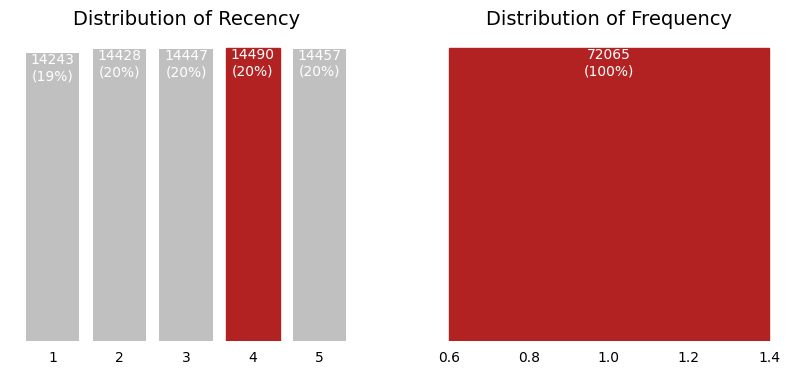

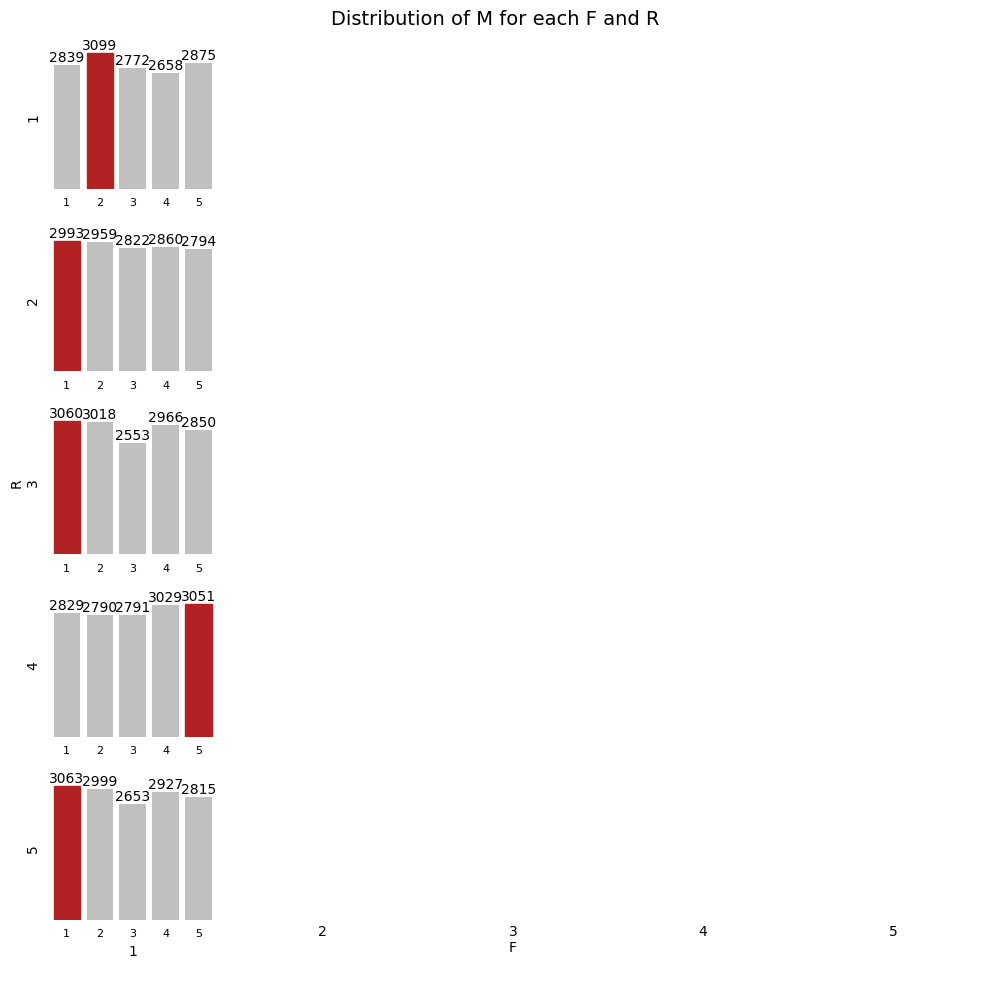

In [263]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

<div class='alert alert-block alert-info'>
Если посмотреть на распределение показателя Recency, то увидим, что у нас почти одинаковое количество +- 20% распределено в каждом ранге. 

Показатель Frequency везде равен 1. Это значит, что у нас очень нелояльная аудитория с низкой активностью.

На основании R и F делаю вывод, что маргетинг хорошо работает с привлечением новых клиентов, но плохо с удержанием старых.

Распределение Monetary в зависимости от показателей Recency и Frequency (т.к. F = 1, то речь пойдет про 
зависимость от R). Наши клиенты тратят +- одинаково на протяжении всего периода исследования. При чем показатель M
распределен по рангам от 1 до 5 приблизительно одинаково на протяжении всего периода исследования.
</div>

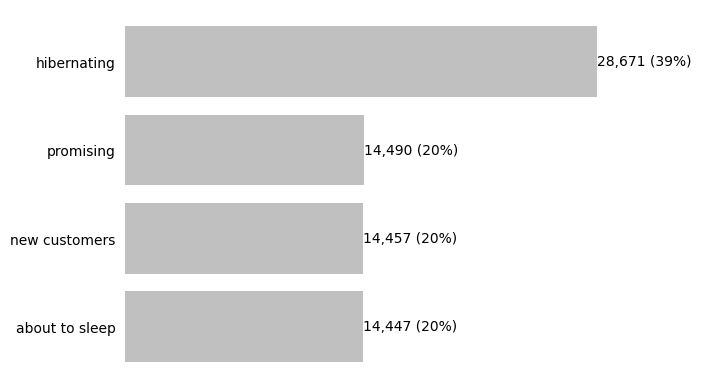

In [264]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

<div class='alert alert-block alert-info'>
39% наших клиентов находятся в спящем режиме, 20% готовятся спать, 20% новых клиентов, 20% многообещающих. 
Статистика не очень хорошая, в группе риска у нас находится 59% наших покупателей.<br>
Вывод: Маркетингу нужно простимулировать клиентов покупать чаще. 
</div>